## Творче аналітичне завдання

### Задача: 
Провести 3 самостійних аналізи на даних Yulu, кожен з яких має використовувати одну (або кілька) з освоєних нами візуалізацій і супроводжуватись висновками з побудованої вами візуалізації. 1 аналіз - це відповідь на поставлене Вами питання до даних.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачівних користувачів

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data_path = 'data/yulu_rental.csv'
df = pd.read_csv(data_path)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### 1. Яка середня швидкість вітру для кожного сезону?

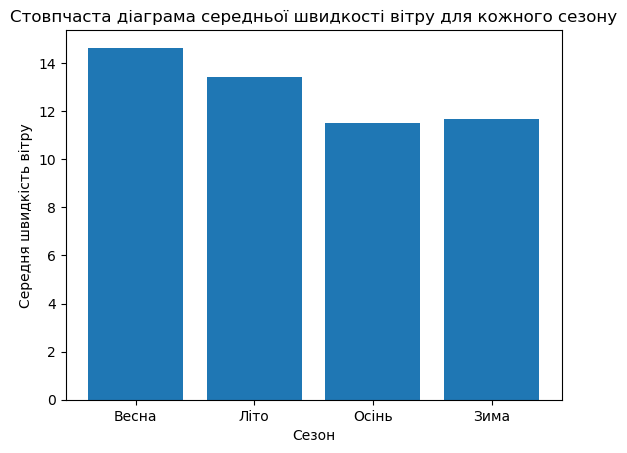

In [22]:
df_season_windspeed_grouped = df.groupby('season')['windspeed'].mean().reset_index()
plt.bar(df_season_windspeed_grouped['season'], df_season_windspeed_grouped['windspeed'])
plt.xticks(ticks=[1, 2, 3, 4], labels=["Весна", "Літо", "Осінь", "Зима"])
plt.title('Стовпчаста діаграма середньої швидкості вітру для кожного сезону')
plt.xlabel('Сезон')
plt.ylabel('Cередня швидкість вітру')
plt.show()

Для аналізу застосовуємо стовпчасту діаграму, яка використовується для порівняннями між категоріями (сезон, середня швидкість вітру).
На графіку ми можемо побачити яка середня швидкість вітру та як вона змінюється від одного сезону до іншого, цей показник для кожного з сезонів є приблизно однаковим (11 -14 км\г), весна має найвищу середню швидкість вітру серед усіх сезонів, осінь найнижчу.

#### 2. Яка середня кількість велосипедів, взятих в оренду, за сезонами?

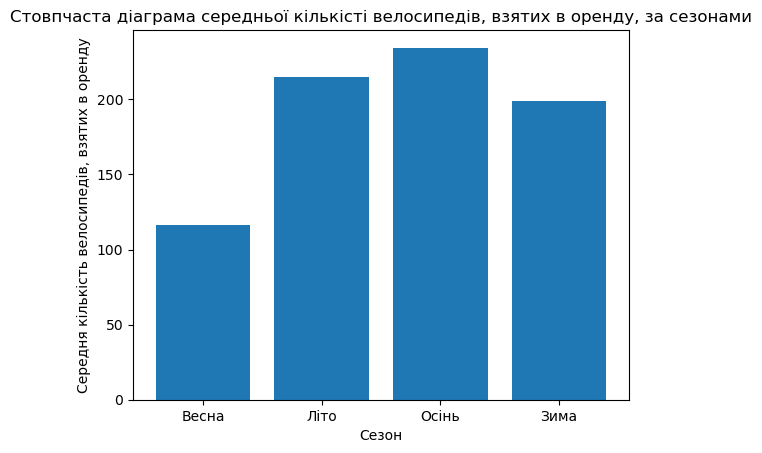

In [60]:
df_count_by_season = df.groupby('season')['count'].mean().reset_index()
plt.bar(df_count_by_season['season'], df_count_by_season['count'])
plt.xticks(ticks=df_count_by_season['season'])
plt.xticks(ticks=[1, 2, 3, 4], labels=["Весна", "Літо", "Осінь", "Зима"])
plt.title('Стовпчаста діаграма середньої кількісті велосипедів, взятих в оренду, за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість велосипедів, взятих в оренду')
plt.show()

На графіку можемо побачити яка середня кількість велосипедів, взятих в аренду, за кожним з сезонів та як зміна сезону впливає на цю середню кількість. Бачимо, що найбільша сережня кількість восени, найменьша навесні. Можемо зробити висновок, що сезони мають вплив на кількість аренди велосипедів.

#### 3. Як швидкість вітру впливає на загальну кількість велосипедів, взятих в оренду, за сезонами?

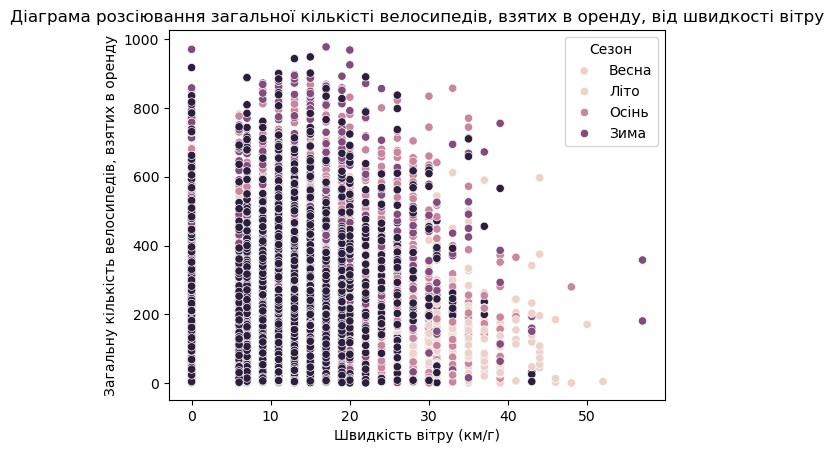

In [76]:
sns.scatterplot(data=df, x='windspeed', y='count', hue='season')
plt.legend(title='Сезон', labels=["Весна", "Літо", "Осінь", "Зима"])
plt.title('Діаграма розсіювання загальної кількісті велосипедів, взятих в оренду, від швидкості вітру')
plt.xlabel('Швидкість вітру (км/г)')
plt.ylabel('Загальну кількість велосипедів, взятих в оренду')
plt.show()

Для аналізу використовуємо точковий графік, який показує, як два числові параметри (швидкість вітру та кількість орендованих велосипедів) взаємодіють один з одним. Цей графік зручний для простого порівняння двох змінних.
На графіку можемо побачити як швидкість вітру впливає на кількість арендованих велосипедів в залежності від сезону.
Найбільша кількість аренди велосипедів припадає на мінімальну швидкість вітру (0), зі збільшенням швидкості вітру зменьшується і кількість аренди.

Виходячи з аналізу трьох графиків, можна зробити декілька рекомендацій: 
Навесні швидкість вітру найвища, тому варто враховувати це при плануванні оренди велосипедів. Наприклад, можна зменшити кількість велосипедів в районах, де буває сильний вітер, або запропонувати якісь аксесуари (рукавички, шоломи). Це також стосується осені та зими, коли погодні умови можуть впливати на зручність катання, тому варто продумати спеціальні пропозиції для цих сезонів.
Влітку зазвичай попит на оренду більш стабільний, тому варто підготувати сезонні знижки або акції, щоб стимулювати ще більший попит.